In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('1.04. Real-life example.csv')

In [3]:
df.sample(11)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
2355,Audi,16000.0,sedan,180,3.0,Diesel,yes,2006,A6
3141,Volkswagen,6000.0,vagon,250,5.0,Diesel,yes,1995,Passat B4
3429,Audi,19700.0,crossover,172,3.6,Petrol,yes,2007,Q7
1469,Volkswagen,1500.0,sedan,255,1.9,Diesel,no,1998,Polo
2794,Mitsubishi,4500.0,sedan,300,1.6,Gas,yes,2000,Carisma
2056,Volkswagen,47777.0,sedan,91,3.0,Diesel,yes,2012,Phaeton
1068,Mercedes-Benz,7000.0,sedan,300,4.3,Gas,yes,2000,E-Class
3937,BMW,23900.0,crossover,235,3.0,Diesel,yes,2007,X5
3996,Renault,9300.0,van,200,1.5,Diesel,yes,2009,Grand Scenic
3772,BMW,8900.0,sedan,240,2.0,Diesel,yes,2001,320


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [5]:
df.shape

(4345, 9)

## Data Preprocessing

### Data Cleaning

In [6]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.duplicated().sum()

50

In [9]:
df=df.drop_duplicates()

In [10]:
df=df.reset_index(drop=True)

In [11]:
df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

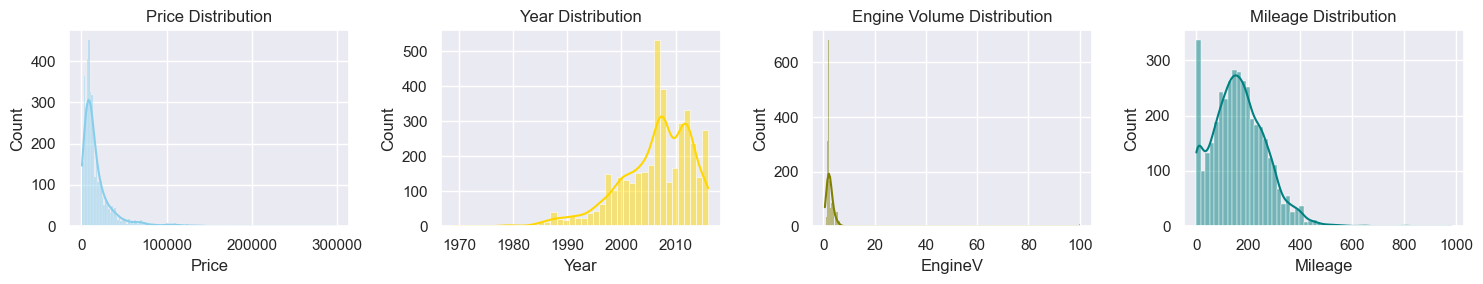

In [12]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 3))

sns.histplot(df['Price'], kde=True, ax=ax1,color='skyblue')
ax1.set_title('Price Distribution')

sns.histplot(df['Year'], kde=True, ax=ax2,color='gold')
ax2.set_title('Year Distribution')

sns.histplot(df['EngineV'], kde=True, ax=ax3,color='olive')
ax3.set_title('Engine Volume Distribution')

sns.histplot(df['Mileage'], kde=True, ax=ax4,color='teal')
ax4.set_title('Mileage Distribution')

plt.tight_layout()  # Adjust the layout to make sure there's no overlap
plt.show()

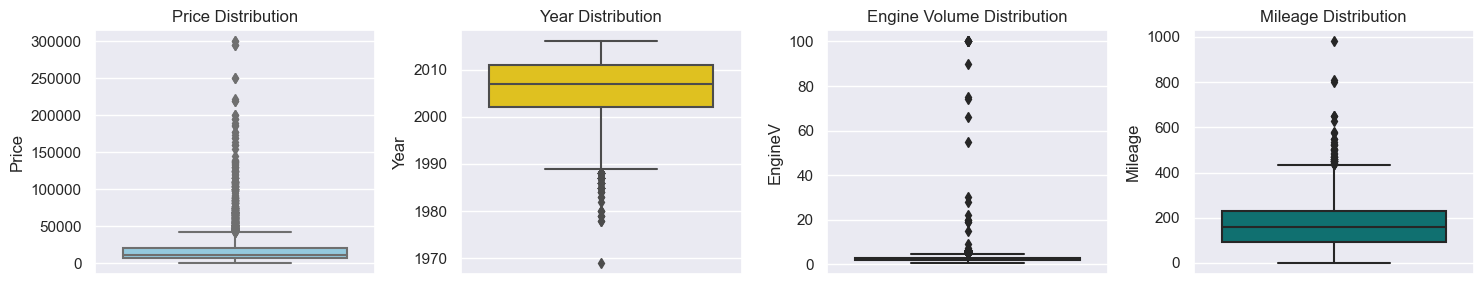

In [13]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 3))


sns.boxplot(y=df['Price'], ax=ax1, color='skyblue')
ax1.set_title('Price Distribution')

sns.boxplot(y=df['Year'], ax=ax2, color='gold')
ax2.set_title('Year Distribution')

sns.boxplot(y=df['EngineV'], ax=ax3, color='olive')
ax3.set_title('Engine Volume Distribution')

sns.boxplot(y=df['Mileage'], ax=ax4, color='teal')
ax4.set_title('Mileage Distribution')

plt.tight_layout()  
plt.show()

In [14]:
q=df['Price'].quantile(0.99)
df1=df[df['Price']<q]
df1.describe()

,Price,Mileage,EngineV,Year
count,3933.000000,3933.000000,3933.000000,3933.000000
mean,17361.081098,166.424104,2.744266,2006.200102
std,18162.274471,102.458875,4.986896,6.659452
min,600.000000,0.000000,0.600000,1969.000000
25%,6900.000000,95.000000,1.800000,2002.000000
50%,11200.000000,160.000000,2.200000,2007.000000
75%,20900.000000,230.000000,3.000000,2011.000000
max,124999.000000,980.000000,99.990000,2016.000000


In [15]:
q=df1['Mileage'].quantile(0.99)
df2 = df1[df1['Mileage']<q]
df2.describe()

,Price,Mileage,EngineV,Year
count,3893.000000,3893.000000,3893.000000,3893.000000
mean,17454.220899,162.757513,2.748163,2006.297457
std,18190.069360,95.652913,5.011726,6.582771
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,94.000000,1.800000,2003.000000
50%,11300.000000,159.000000,2.200000,2007.000000
75%,20996.240000,230.000000,3.000000,2011.000000
max,124999.000000,435.000000,99.990000,2016.000000


In [16]:
q=df2['Year'].quantile(0.01)
df3=df2[df2['Year'] > q]
df3.describe()

,Price,Mileage,EngineV,Year
count,3839.000000,3839.000000,3839.000000,3839.000000
mean,17654.243842,162.035686,2.759443,2006.601980
std,18230.481223,95.218465,5.045652,6.091234
min,800.000000,0.000000,0.600000,1988.000000
25%,7100.000000,94.000000,1.800000,2003.000000
50%,11500.000000,159.000000,2.200000,2007.000000
75%,21000.000000,229.000000,3.000000,2011.000000
max,124999.000000,435.000000,99.990000,2016.000000


In [17]:
df4 = df3[df3['EngineV']<(6.5)]

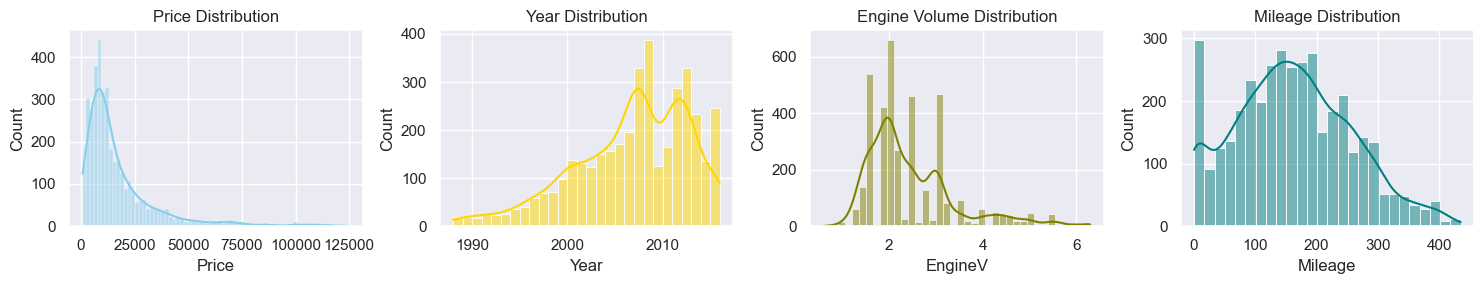

In [18]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 3))

sns.histplot(df4['Price'], kde=True, ax=ax1,color='skyblue')
ax1.set_title('Price Distribution')

sns.histplot(df4['Year'], kde=True, ax=ax2,color='gold')
ax2.set_title('Year Distribution')

sns.histplot(df4['EngineV'], kde=True, ax=ax3,color='olive')
ax3.set_title('Engine Volume Distribution')

sns.histplot(df4['Mileage'], kde=True, ax=ax4,color='teal')
ax4.set_title('Mileage Distribution')

plt.tight_layout()  # Adjust the layout to make sure there's no overlap
plt.show()

### Verifying OLS assumption
### Linearity

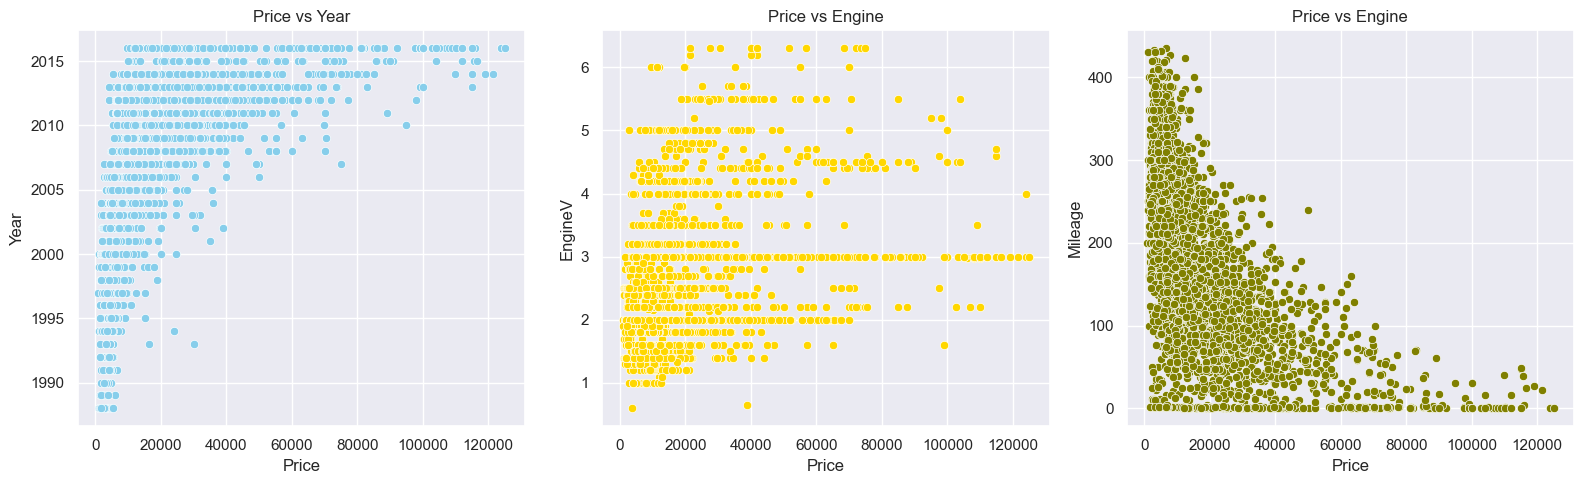

In [19]:
f, (ax1, ax2, ax3,) = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(df4['Price'],df4['Year'], ax=ax1,color='skyblue')
ax1.set_title('Price vs Year')

sns.scatterplot(df4['Price'], df4['EngineV'],ax=ax2,color='gold')
ax2.set_title('Price vs Engine')

sns.scatterplot(df4['Price'],df4['Mileage'], ax=ax3,color='olive')
ax3.set_title('Price vs Engine')


plt.tight_layout()  # Adjust the layout to make sure there's no overlap
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

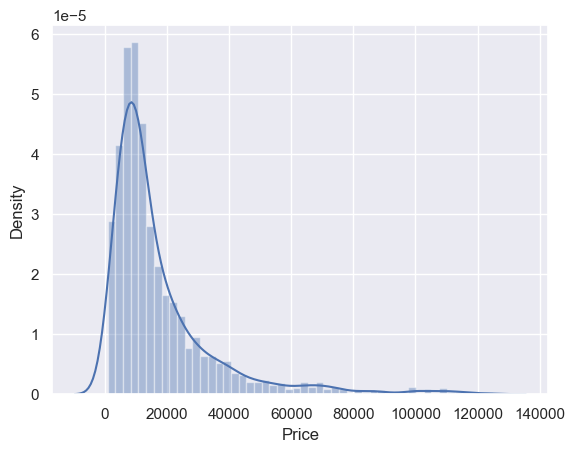

In [20]:
sns.distplot(df4['Price']) # We need to make its distribution Normal, so we can than verify the Linearity

In [21]:
data = np.log(df4['Price'])
df4['l_Price'] = data

<AxesSubplot:xlabel='l_Price', ylabel='Density'>

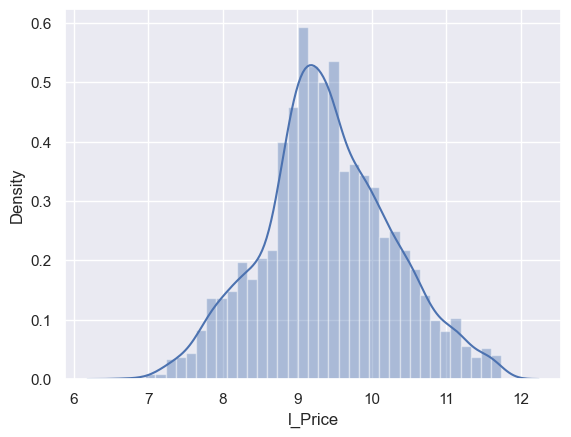

In [22]:
sns.distplot(df4['l_Price'])

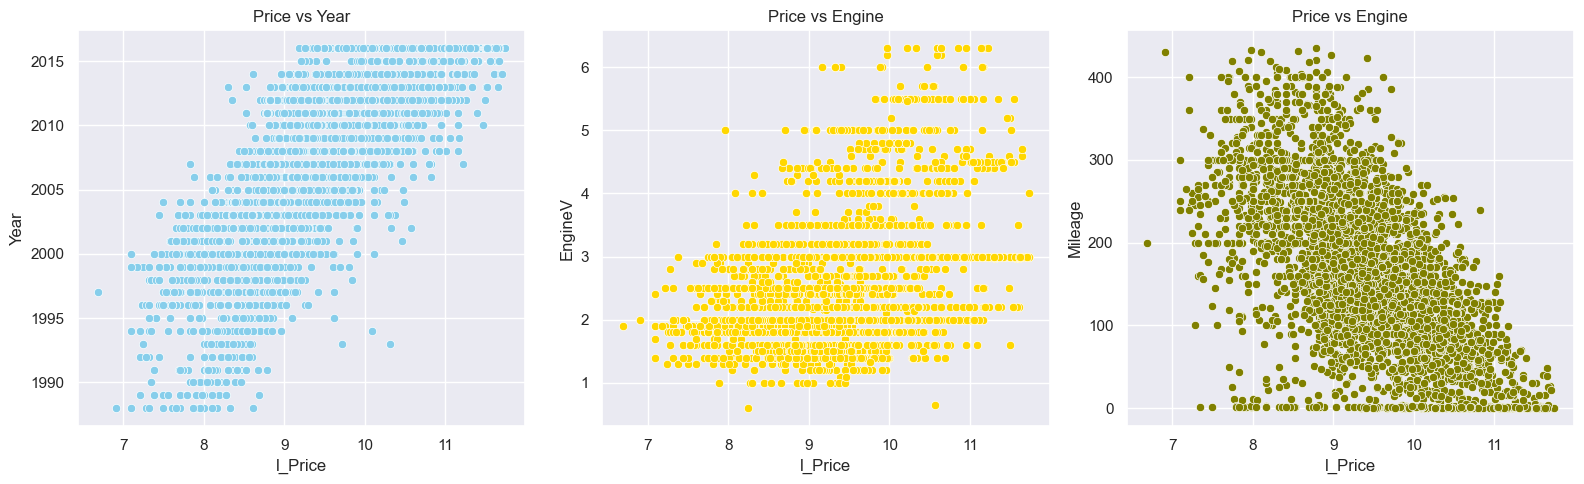

In [23]:
f, (ax1, ax2, ax3,) = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(df4['l_Price'],df4['Year'], ax=ax1,color='skyblue')
ax1.set_title('Price vs Year')

sns.scatterplot(df4['l_Price'], df4['EngineV'],ax=ax2,color='gold')
ax2.set_title('Price vs Engine')

sns.scatterplot(df4['l_Price'],df4['Mileage'], ax=ax3,color='olive')
ax3.set_title('Price vs Engine')


plt.tight_layout()  # Adjust the layout to make sure there's no overlap
plt.show()

In [24]:
df4 = df4.drop(['Price'],axis=1)

### Multicolinearity

In [25]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df4[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [26]:
vif

,VIF,features
0,3.859718,Mileage
1,10.358336,Year
2,7.652842,EngineV


In [27]:
df4 = df4.drop(['Year'],axis=1)

In [28]:
df4

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,l_Price
0,BMW,sedan,277,2.0,Petrol,yes,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,Rav 4,9.814656
...,...,...,...,...,...,...,...,...
3968,Renault,sedan,152,1.6,Petrol,yes,Megane,8.824678
3969,Volkswagen,van,163,2.5,Diesel,yes,T5 (Transporter),9.350102
3970,Toyota,sedan,35,1.6,Petrol,yes,Corolla,9.792556
3972,BMW,sedan,1,3.5,Petrol,yes,535,8.779557


In [29]:
df4_ = pd.get_dummies(df4,drop_first=True)

### Loading Data

In [30]:
target = df4_['l_Price']
input = df4_.drop(['l_Price'],axis=1)

### scaling data

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
x_scaled = StandardScaler()
x_scaled = x_scaled.fit(input)

In [33]:
x_scaled = x_scaled.transform(input)

In [34]:
x_scaled

array([[ 1.20920701, -0.47123162,  2.28363388, ..., -0.06068173,
        -0.01619022, -0.03239318],
       [ 2.78409368,  0.47749125, -0.43789856, ..., -0.06068173,
        -0.01619022, -0.03239318],
       [ 2.05964581,  2.69117796, -0.43789856, ..., -0.06068173,
        -0.01619022, -0.03239318],
       ...,
       [-1.33161015, -0.89288624, -0.43789856, ..., -0.06068173,
        -0.01619022, -0.03239318],
       [-1.68858446,  1.10997317,  2.28363388, ..., -0.06068173,
        -0.01619022, -0.03239318],
       [-0.39717739, -0.47123162, -0.43789856, ..., -0.06068173,
        -0.01619022, -0.03239318]])

### Test and Train

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,target,test_size=0.2,random_state=365)

In [39]:
reg=LinearRegression()

In [40]:
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
y_hat=reg.predict(x_train)

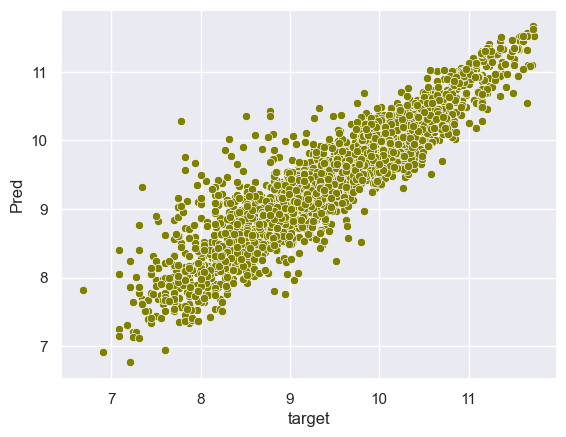

In [42]:
sns.scatterplot(y_train,y_hat,color ='olive')
plt.xlabel('target')
plt.ylabel('Pred')
plt.show()

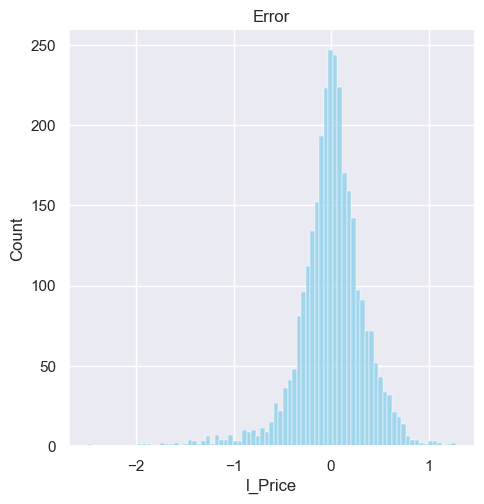

In [43]:
sns.displot(y_train-y_hat,color='skyblue')
plt.title('Error')
plt.show()

In [44]:
reg.score(x_train,y_train)

0.8446493814856351

### Finding weight and Bias

In [45]:
reg.coef_

array([-3.58019512e-01,  3.43048767e-02,  1.24950756e+12,  1.33962359e+12,
       -8.03202812e+12, -2.31991723e+12, -2.46092935e+12,  1.78684381e+12,
       -4.81623132e-02,  1.83105469e-03, -4.00390625e-02, -4.26025391e-02,
       -1.19628906e-02, -1.02050781e-01, -2.91748047e-02, -1.21093750e-01,
        3.11645508e-01,  2.12783821e+11,  1.73793940e+11,  3.88183594e-02,
        4.18701172e-02, -1.33056641e-02,  2.45749533e+11,  1.53808594e-02,
        1.06811523e-02,  1.67846680e-02,  2.51770020e-02,  1.12304688e-02,
        1.73793940e+11,  1.58081055e-02, -1.22070312e-03,  2.60009766e-02,
        6.35986328e-02,  1.14868164e-01,  5.49316406e-03,  2.85034180e-02,
        3.72924805e-02,  4.99877930e-02,  3.12500000e-02,  2.88391113e-02,
        2.52075195e-02,  1.21801505e+12,  2.44750977e-02,  4.29534912e-02,
        1.61163330e-01,  6.13403320e-02,  6.51843244e+10,  7.56835938e-02,
        5.38940430e-02,  1.15615845e-01,  8.27636719e-02,  2.97241211e-02,
        2.06909180e-02,  

In [46]:
reg.intercept_

-205340250201.30368

In [47]:
summery = pd.DataFrame(input.columns.values,columns = ['Feature'])

In [48]:
summery['Weight'] = reg.coef_
summery['Bias']  = reg.intercept_


In [120]:
summery

,Feature,Weight,Bias
0,Mileage,-3.580195e-01,-2.053403e+11
1,EngineV,3.430488e-02,-2.053403e+11
2,Brand_BMW,1.249508e+12,-2.053403e+11
3,Brand_Mercedes-Benz,1.339624e+12,-2.053403e+11
4,Brand_Mitsubishi,-8.032028e+12,-2.053403e+11
...,...,...,...
302,Model_X6,1.657410e-01,-2.053403e+11
303,Model_X6 M,5.578613e-02,-2.053403e+11
304,Model_Yaris,6.495683e+11,-2.053403e+11
305,Model_Z3,1.171875e-02,-2.053403e+11


### TESTING

(6.0, 13.0)

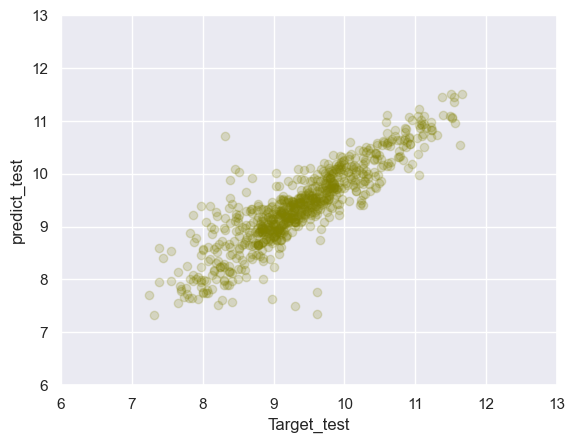

In [49]:
y_hat_=reg.predict(x_test)
plt.scatter(y_test,y_hat_,color='olive',alpha=0.2)
plt.xlabel('Target_test',size=12)
plt.ylabel('predict_test',size=12)
plt.xlim(6,13)
plt.ylim(6,13)

In [50]:
pred=pd.DataFrame(np.exp(y_hat_) ,columns=['Prediction'])

In [51]:
pred.head()

,Prediction
0,10587.136649
1,9505.320121
2,8146.226221
3,7776.030508
4,11810.804411


In [52]:
y_test = y_test.reset_index(drop = True)

In [53]:
pred['target'] = np.exp(y_test)

In [54]:
pred

,Prediction,target
0,10587.136649,9200.00
1,9505.320121,9999.00
2,8146.226221,8950.00
3,7776.030508,7200.00
4,11810.804411,13300.95
...,...,...
759,6835.569177,8200.00
760,6889.181210,6400.00
761,7107.867297,9200.00
762,26785.545548,40755.00


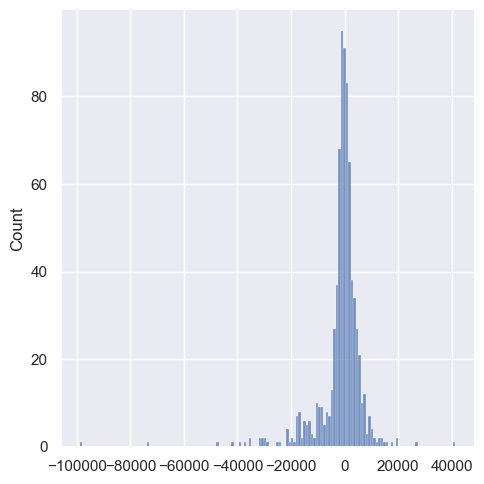

In [55]:
sns.displot(pred['Prediction'] - pred['target'])

In [56]:
pred['Residual'] =  pred['Prediction'] - pred['target']

In [57]:
pred

,Prediction,target,Residual
0,10587.136649,9200.00,1387.136649
1,9505.320121,9999.00,-493.679879
2,8146.226221,8950.00,-803.773779
3,7776.030508,7200.00,576.030508
4,11810.804411,13300.95,-1490.145589
...,...,...,...
759,6835.569177,8200.00,-1364.430823
760,6889.181210,6400.00,489.181210
761,7107.867297,9200.00,-2092.132703
762,26785.545548,40755.00,-13969.454452


### Evaluating the Model


In [58]:
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
r2 = r2_score(y_test, y_hat_)

In [91]:
mse = mean_squared_error(y_test, y_hat_)
mse

1.9133746197378838e+26

### 
Our Linear Regression Model has been completed with an MSE of 1.9133746197378838e+26, indicating that the error is large. Therefore, we will use the optimization algorithm, gradient descent, to minimize the MSE of our model.

### Optimization Using Gradient Decent

In [152]:
def gradient_descent(input, target, learning_rate=0.2, iterations=800):
    m, n = input.shape
    X_b = np.c_[np.ones((m, 1)), input]  # Add bias term
    theta = np.random.randn(n + 1)  # Initial parameters
    
    for iteration in range(iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - target)
        theta = theta - learning_rate * gradients
        
        if iteration % 100 == 0:
            cost = np.mean((X_b.dot(theta) - target) ** 2)
            print(f"Iteration {iteration}: Cost = {cost}")
    
    return theta

# Train the model
theta_optimal = gradient_descent(x_train, y_train)
print(f"Optimal Parameters: {theta_optimal}")


Iteration 0: Cost = 110.99547871000549
Iteration 100: Cost = 0.12285081478528935
Iteration 200: Cost = 0.11905527470873199
Iteration 300: Cost = 0.11811052112492777
Iteration 400: Cost = 0.11781620475036601
Iteration 500: Cost = 0.11768410144256357
Iteration 600: Cost = 0.11760154160574379
Iteration 700: Cost = 0.11753983134920559
Optimal Parameters: [ 9.35936457e+00 -3.58190853e-01  3.85462938e-02 -3.34971577e-01
 -3.39464369e-01 -2.94501605e-01 -1.76207819e+00 -9.16292997e-01
 -8.63130873e-01 -5.27372027e-02  4.13750596e-03 -4.13154606e-02
 -4.29762911e-02 -1.13843562e-02 -9.88800282e-02 -2.96482022e-02
 -1.22230166e-01  3.08238806e-01 -1.21427299e-01  2.98386503e-02
 -2.93337673e-03 -6.23698280e-03 -3.56569829e-02  6.16749621e-02
 -3.64875829e-02 -3.49618191e-02 -1.96852016e-02 -2.01879579e-03
 -2.59301351e-02  4.39750203e-02 -1.28198324e-02 -2.62362615e-02
 -3.45845584e-02 -6.67433724e-02 -6.17396633e-02 -1.65443772e-02
 -3.45622220e-02 -2.74858853e-02 -2.10907978e-02 -2.13377385e-

In [153]:
def predict(input, theta):
    m = input.shape[0]
    X_b = np.c_[np.ones((m, 1)), input]  # Add bias term
    return X_b.dot(theta)

# Predicting test set values
y_pred = predict(x_test, theta_optimal)

# Evaluating the model
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

print(f"Test MSE: {mse(y_test, y_pred)}")


Test MSE: 28.018193301639407


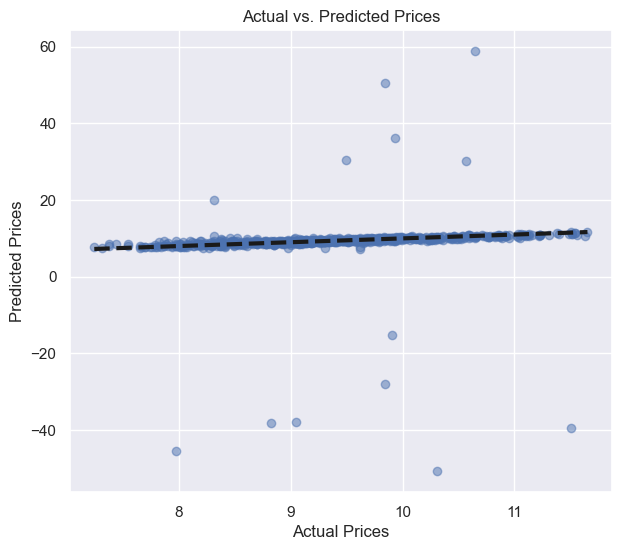

In [154]:

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # Diagonal line
plt.show()


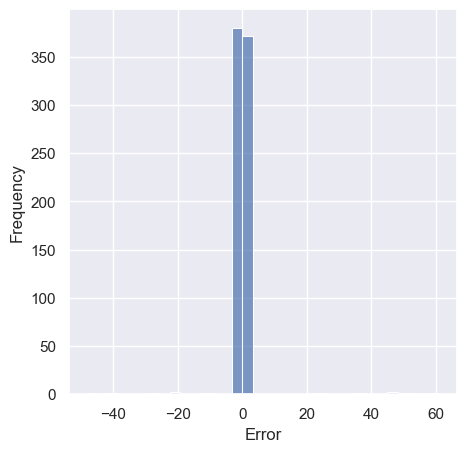

In [155]:
residuals = y_test - y_pred
plt.figure(figsize=(5, 5))
sns.histplot(residuals,bins =34 ,alpha=0.7)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()